In [28]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset
pk = pd.read_csv('./parkinsons.csv')
pk = pk.dropna()

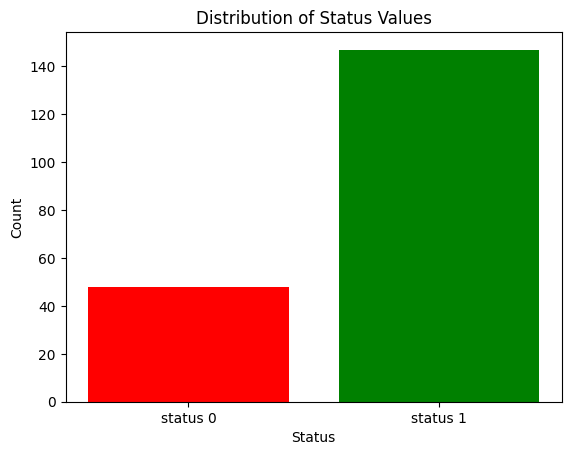

In [30]:
# Create a bar graph to show the distribution of status values
labels = ['status 0', 'status 1']
values = [48, 147]
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Values')
plt.show()

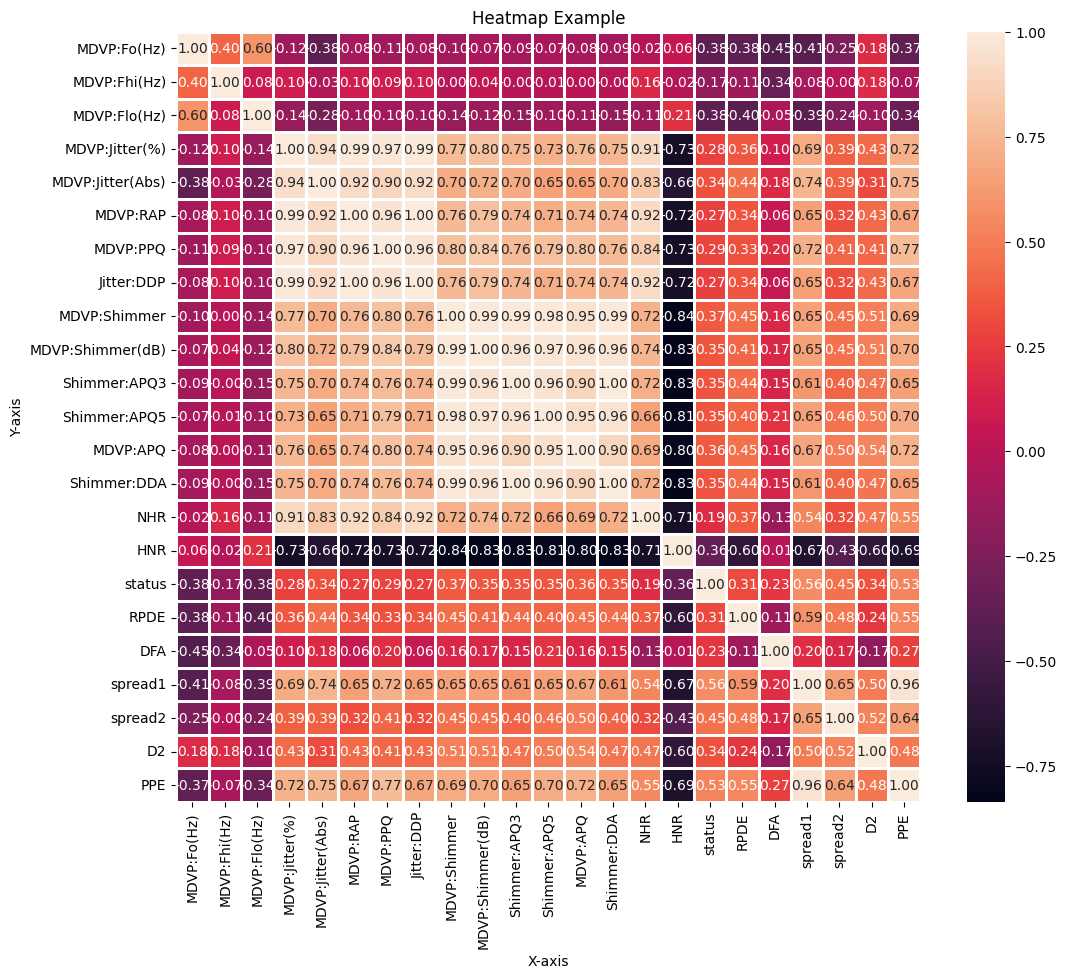

In [31]:
# Create a heatmap to visualize feature correlations
pk = pk.drop(columns='name',axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(pk.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title('Heatmap Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [32]:
# Preprocessing: Normalize the feature data using MinMaxScaler
remove_list = ['status'] 
x = pk.drop(columns=remove_list, axis=1)
y = pk['status']

In [33]:

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [34]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=9)

In [35]:
# Hyperparameter tuning using GridSearchCV for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_
pred_svc = best_svc.predict(x_test)
accuracy_svc = accuracy_score(pred_svc, y_test)
print("Best SVC parameters:", svc_grid.best_params_)
print("SVC accuracy:", round(accuracy_svc * 100, 2), "%")

Best SVC parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC accuracy: 92.31 %


In [36]:
# Hyperparameter tuning using GridSearchCV for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000]
}

lr_grid = GridSearchCV(LogisticRegression(solver='lbfgs'), lr_param_grid, cv=5)
lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_
pred_lr = best_lr.predict(x_test)
accuracy_lr = accuracy_score(pred_lr, y_test)
print("Best LR parameters:", lr_grid.best_params_)
print("Logistic Regression accuracy:", round(accuracy_lr * 100, 2), "%")

Best LR parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression accuracy: 82.05 %


In [37]:
# Hyperparameter tuning using GridSearchCV for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid.fit(x_train, y_train)
best_dt = dt_grid.best_estimator_
pred_dt = best_dt.predict(x_test)
accuracy_dt = accuracy_score(pred_dt, y_test)
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Decision Tree accuracy:", round(accuracy_dt * 100, 2), "%")

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree accuracy: 79.49 %


In [38]:
# Hyperparameter tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_
pred_rf = best_rf.predict(x_test)
accuracy_rf = accuracy_score(pred_rf, y_test)
print("Best Random Forest parameters:", rf_grid.best_params_)
print("Random Forest accuracy:", round(accuracy_rf * 100, 2), "%")

Best Random Forest parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest accuracy: 89.74 %


In [39]:
# Hyperparameter tuning using GridSearchCV for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_
pred_knn = best_knn.predict(x_test)
accuracy_knn = accuracy_score(pred_knn, y_test)
print("Best K-Nearest Neighbors parameters:", knn_grid.best_params_)
print("K-Nearest Neighbors accuracy:", round(accuracy_knn * 100, 2), "%")





Best K-Nearest Neighbors parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
K-Nearest Neighbors accuracy: 94.87 %


In [40]:

# Hyperparameter tuning using GridSearchCV for Bagging Classifier
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_grid = GridSearchCV(BaggingClassifier(), bagging_param_grid, cv=5)
bagging_grid.fit(x_train, y_train)
best_bagging = bagging_grid.best_estimator_
pred_bagging = best_bagging.predict(x_test)
accuracy_bagging = accuracy_score(pred_bagging, y_test)
print("Best Bagging Classifier parameters:", bagging_grid.best_params_)
print("Bagging Classifier accuracy:", round(accuracy_bagging * 100, 2), "%")


Best Bagging Classifier parameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 50}
Bagging Classifier accuracy: 92.31 %


# precision score F1,recall, confusion matrix 

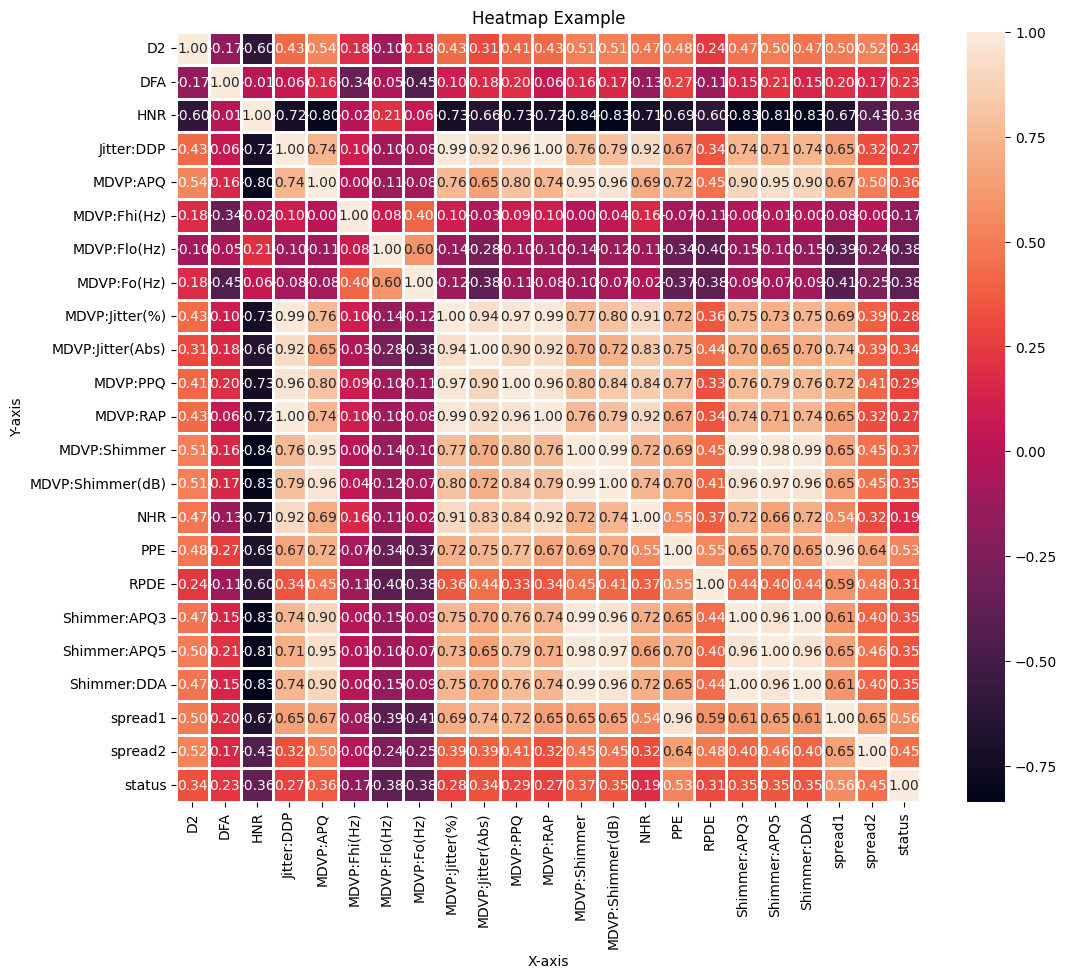

SVC - Precision: 0.9032258064516129
SVC - Recall: 1.0
SVC - F1 Score: 0.9491525423728813


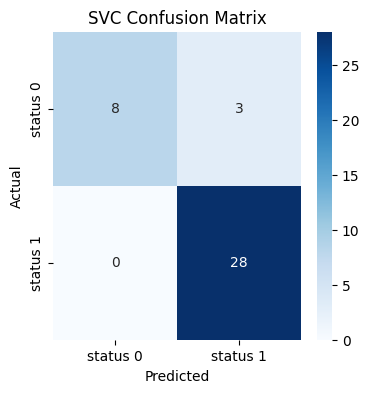

Logistic Regression - Precision: 0.8181818181818182
Logistic Regression - Recall: 0.9642857142857143
Logistic Regression - F1 Score: 0.8852459016393442


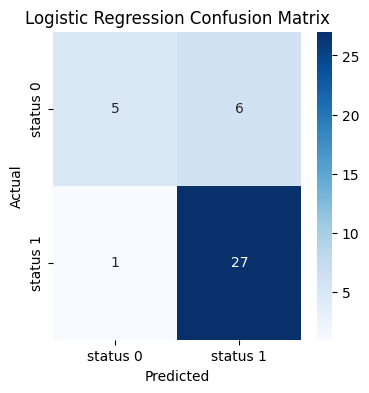

In [41]:
 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load the dataset
pk = pd.read_csv('./parkinsons.csv')
pk = pk.dropna()

# Drop non-numeric and non-usable columns
non_numeric_columns = pk.select_dtypes(exclude='number').columns
non_usable_columns = ['name']  # Add other non-usable columns if present
usable_columns = pk.columns.difference(non_numeric_columns.union(non_usable_columns))
pk_numeric = pk[usable_columns]

# Create a heatmap to visualize feature correlations for numeric data
plt.figure(figsize=(12, 10))
sns.heatmap(pk_numeric.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title('Heatmap Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Preprocessing: Normalize the feature data using MinMaxScaler
remove_list = ['status','name'] 
x = pk.drop(columns=remove_list, axis=1)
y = pk['status']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=9)

# Hyperparameter tuning using GridSearchCV for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_

# Calculate precision, recall, F1 score for SVC
pred_svc = best_svc.predict(x_test)
precision_svc = precision_score(y_test, pred_svc)
recall_svc = recall_score(y_test, pred_svc)
f1_svc = f1_score(y_test, pred_svc)
print("SVC - Precision:", precision_svc)
print("SVC - Recall:", recall_svc)
print("SVC - F1 Score:", f1_svc)

# Create confusion matrix for SVC
cm_svc = confusion_matrix(y_test, pred_svc)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000]
}

lr_grid = GridSearchCV(LogisticRegression(solver='lbfgs'), lr_param_grid, cv=5)
lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_

# Calculate precision, recall, F1 score for Logistic Regression
pred_lr = best_lr.predict(x_test)
precision_lr = precision_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)
print("Logistic Regression - Precision:", precision_lr)
print("Logistic Regression - Recall:", recall_lr)
print("Logistic Regression - F1 Score:", f1_lr)

# Create confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()




K-Nearest Neighbors - Precision: 0.9333333333333333
K-Nearest Neighbors - Recall: 1.0
K-Nearest Neighbors - F1 Score: 0.9655172413793104


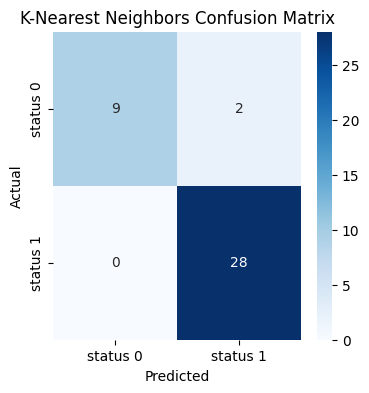

C:\Users\mgrpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mgrpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mgrpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\mgrpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-pac

Bagging Classifier - Precision: 0.9
Bagging Classifier - Recall: 0.9642857142857143
Bagging Classifier - F1 Score: 0.9310344827586207


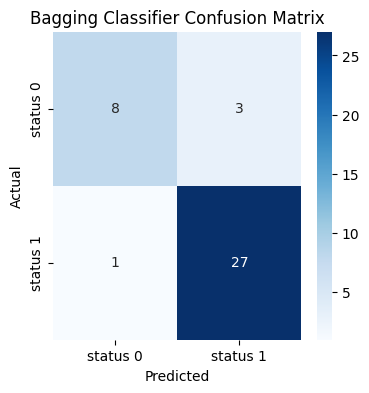

In [42]:

# Hyperparameter tuning using GridSearchCV for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_

# Calculate precision, recall, F1 score for K-Nearest Neighbors
pred_knn = best_knn.predict(x_test)
precision_knn = precision_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)
print("K-Nearest Neighbors - Precision:", precision_knn)
print("K-Nearest Neighbors - Recall:", recall_knn)
print("K-Nearest Neighbors - F1 Score:", f1_knn)

# Create confusion matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV for Bagging Classifier
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_grid = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier()), bagging_param_grid, cv=5)
bagging_grid.fit(x_train, y_train)
best_bagging = bagging_grid.best_estimator_

# Calculate precision, recall, F1 score for Bagging Classifier
pred_bagging = best_bagging.predict(x_test)
precision_bagging = precision_score(y_test, pred_bagging)
recall_bagging = recall_score(y_test, pred_bagging)
f1_bagging = f1_score(y_test, pred_bagging)
print("Bagging Classifier - Precision:", precision_bagging)
print("Bagging Classifier - Recall:", recall_bagging)
print("Bagging Classifier - F1 Score:", f1_bagging)

# Create confusion matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, pred_bagging)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bagging Classifier Confusion Matrix')
plt.show()

# ... Continue with other classifiers if needed ...


Decision Tree - Precision: 0.92
Decision Tree - Recall: 0.8214285714285714
Decision Tree - F1 Score: 0.8679245283018867


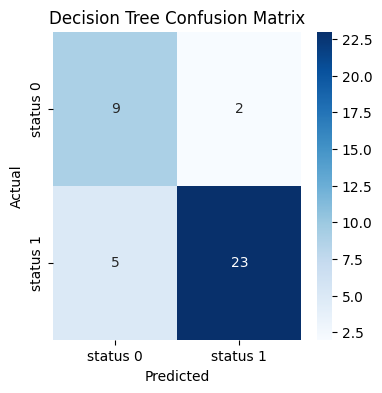

Random Forest - Precision: 0.875
Random Forest - Recall: 1.0
Random Forest - F1 Score: 0.9333333333333333


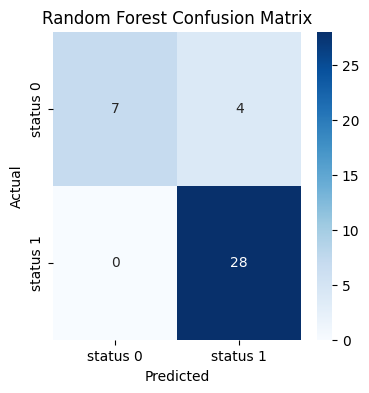

In [43]:

# Hyperparameter tuning using GridSearchCV for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid.fit(x_train, y_train)
best_dt = dt_grid.best_estimator_

# Calculate precision, recall, F1 score for Decision Tree
pred_dt = best_dt.predict(x_test)
precision_dt = precision_score(y_test, pred_dt)
recall_dt = recall_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt)
print("Decision Tree - Precision:", precision_dt)
print("Decision Tree - Recall:", recall_dt)
print("Decision Tree - F1 Score:", f1_dt)

# Create confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(4,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_

# Calculate precision, recall, F1 score for Random Forest
pred_rf = best_rf.predict(x_test)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

# Create confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()




# Predicted Model

In [44]:
input_data = [119.99200,157.30200,74.99700,0.00784,0.00007
               ,0.00370,0.00554,0.01109,0.04374,0.42600,0.02182,
               0.03130,0.02971,0.06545,0.02211,21.03300,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654]

In [45]:
len(input_data)

22

In [46]:
scaled_data = scaler.transform([input_data])
prediction = knn_grid.predict(scaled_data)
if prediction[0] == 1:
    print( "Person Has Parkinson disease")
else:
    print( "Person is Safe")

Person Has Parkinson disease


C:\Users\mgrpr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# save the model 


In [47]:
from joblib import dump

# Assuming best_knn is your trained KNN model and scaler is your MinMaxScaler instance
dump(best_knn, 'knn_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [48]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Assuming you have your predictions (pred_svc, pred_lr, pred_knn, pred_bagging, pred_rf, pred_dt) and true labels (y_test) for each model

# Function to calculate miss rate
def miss_rate(y_true, y_pred):
    return 1 - recall_score(y_true, y_pred)

# Calculate miss rate, sensitivity, specificity, positive prediction value, negative prediction value, false positive rate, false negative rate, and F1 score for each model
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    miss = miss_rate(y_true, y_pred)
    sensitivity = recall_score(y_true, y_pred)
    specificity = accuracy_score(y_true[y_true == 0], y_pred[y_true == 0])
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    fp = cm[0, 1]
    fn = cm[1, 0]
    total_neg = np.sum(cm[0, :])
    total_pos = np.sum(cm[1, :])

    false_positive_rate = fp / total_neg
    false_negative_rate = fn / total_pos

    positive_prediction_value = precision_score(y_true, y_pred, pos_label=1)
    negative_prediction_value = precision_score(y_true, y_pred, pos_label=0)

    return accuracy, miss, sensitivity, specificity, precision, f1, false_positive_rate, false_negative_rate, positive_prediction_value, negative_prediction_value

# Calculate metrics for each model
metrics_svc = calculate_metrics(y_test, pred_svc)
metrics_lr = calculate_metrics(y_test, pred_lr)
metrics_knn = calculate_metrics(y_test, pred_knn)
metrics_bagging = calculate_metrics(y_test, pred_bagging)
metrics_rf = calculate_metrics(y_test, pred_rf)
metrics_dt = calculate_metrics(y_test, pred_dt)

# Displaying the metrics for each model
print("SVM Metrics:")
print("Accuracy:", metrics_svc[0])
print("Miss Rate:", metrics_svc[1])
print("Sensitivity:", metrics_svc[2])
print("Specificity:", metrics_svc[3])
print("Precision:", metrics_svc[4])
print("F1 Score:", metrics_svc[5])
print("False Positive Rate:", metrics_svc[6])
print("False Negative Rate:", metrics_svc[7])
print("Positive Prediction Value:", metrics_svc[8])
print("Negative Prediction Value:", metrics_svc[9])
# Similarly, print other models' metrics LR, KNN, Bagging, RF, DT...

print("\nLR Metrics:")
print("Accuracy:", metrics_lr[0])
print("Miss Rate:", metrics_lr[1])
print("Sensitivity:", metrics_lr[2])
print("Specificity:", metrics_lr[3])
print("Precision:", metrics_lr[4])
print("F1 Score:", metrics_lr[5])
print("False Positive Rate:", metrics_lr[6])
print("False Negative Rate:", metrics_lr[7])
print("Positive Prediction Value:", metrics_lr[8])
print("Negative Prediction Value:", metrics_lr[9])

print("\nK-NN Metrics:")
print("Accuracy:", metrics_knn[0])
print("Miss Rate:", metrics_knn[1])
print("Sensitivity:", metrics_knn[2])
print("Specificity:", metrics_knn[3])
print("Precision:", metrics_knn[4])
print("F1 Score:", metrics_knn[5])
print("False Positive Rate:", metrics_knn[6])
print("False Negative Rate:", metrics_knn[7])
print("Positive Prediction Value:", metrics_knn[8])
print("Negative Prediction Value:", metrics_knn[9])

print("\nBC Metrics:")
print("Accuracy:", metrics_bagging[0])
print("Miss Rate:", metrics_bagging[1])
print("Sensitivity:", metrics_bagging[2])
print("Specificity:", metrics_bagging[3])
print("Precision:", metrics_bagging[4])
print("F1 Score:", metrics_bagging[5])
print("False Positive Rate:", metrics_bagging[6])
print("False Negative Rate:", metrics_bagging[7])
print("Positive Prediction Value:", metrics_bagging[8])
print("Negative Prediction Value:", metrics_bagging[9])

print("\nRF Metrics:")
print("Accuracy:", metrics_rf[0])
print("Miss Rate:", metrics_rf[1])
print("Sensitivity:", metrics_rf[2])
print("Specificity:", metrics_rf[3])
print("Precision:", metrics_rf[4])
print("F1 Score:", metrics_rf[5])
print("False Positive Rate:", metrics_rf[6])
print("False Negative Rate:", metrics_rf[7])
print("Positive Prediction Value:", metrics_rf[8])
print("Negative Prediction Value:", metrics_rf[9])

print("\nDT Metrics:")
print("Accuracy:", metrics_dt[0])
print("Miss Rate:", metrics_dt[1])
print("Sensitivity:", metrics_dt[2])
print("Specificity:", metrics_dt[3])
print("Precision:", metrics_dt[4])
print("F1 Score:", metrics_dt[5])
print("False Positive Rate:", metrics_dt[6])
print("False Negative Rate:", metrics_dt[7])
print("Positive Prediction Value:", metrics_dt[8])
print("Negative Prediction Value:", metrics_dt[9])



SVM Metrics:
Accuracy: 0.9230769230769231
Miss Rate: 0.0
Sensitivity: 1.0
Specificity: 0.7272727272727273
Precision: 0.9032258064516129
F1 Score: 0.9491525423728813
False Positive Rate: 0.2727272727272727
False Negative Rate: 0.0
Positive Prediction Value: 0.9032258064516129
Negative Prediction Value: 1.0

LR Metrics:
Accuracy: 0.8205128205128205
Miss Rate: 0.0357142857142857
Sensitivity: 0.9642857142857143
Specificity: 0.45454545454545453
Precision: 0.8181818181818182
F1 Score: 0.8852459016393442
False Positive Rate: 0.5454545454545454
False Negative Rate: 0.03571428571428571
Positive Prediction Value: 0.8181818181818182
Negative Prediction Value: 0.8333333333333334

K-NN Metrics:
Accuracy: 0.9487179487179487
Miss Rate: 0.0
Sensitivity: 1.0
Specificity: 0.8181818181818182
Precision: 0.9333333333333333
F1 Score: 0.9655172413793104
False Positive Rate: 0.18181818181818182
False Negative Rate: 0.0
Positive Prediction Value: 0.9333333333333333
Negative Prediction Value: 1.0

BC Metrics:
A

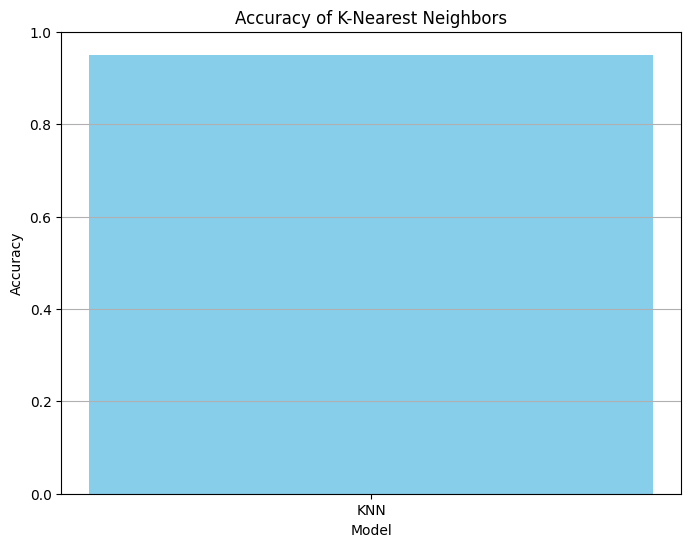

In [49]:


# Assuming you have already executed the code for KNN and obtained accuracy_knn
accuracy_scores = [accuracy_knn]

# Add accuracy scores for different parameters if available
# accuracy_scores = [accuracy_knn, accuracy_knn_2, accuracy_knn_3, ...]

# Labels for the bars
models = ['KNN']

# Add labels for different models if available
# models = ['KNN', 'KNN_2', 'KNN_3', ...]

plt.figure(figsize=(8, 6))

# Creating the bar plot
plt.bar(models, accuracy_scores, color='skyblue')

# Adding titles and labels
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of K-Nearest Neighbors')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy percentage
plt.grid(axis='y')

# Show the plot
plt.show()


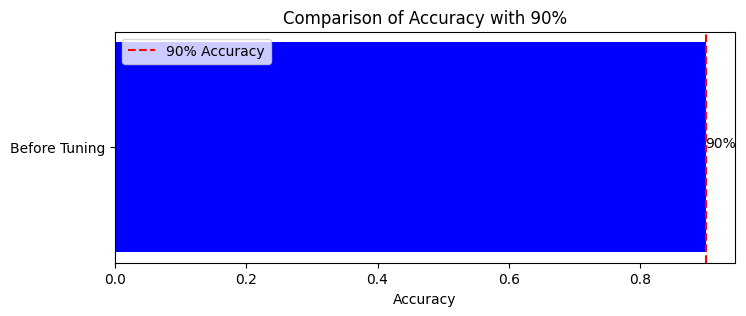

In [51]:
import matplotlib.pyplot as plt

# Accuracy before hyperparameter tuning
accuracy = 0.9  # Assuming the accuracy is 90%

# Creating the comparison bar chart
accuracy_scores = [accuracy]
labels = ['Before Tuning']

plt.figure(figsize=(8, 3))
plt.barh(labels, accuracy_scores, color='blue')
plt.axvline(x=0.9, color='red', linestyle='--', label='90% Accuracy')  # Adding a line at 90% for comparison
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy with 90%')

for index, value in enumerate(accuracy_scores):
    plt.text(value, index, str(round(value * 100)) + "%")

plt.legend()
plt.show()


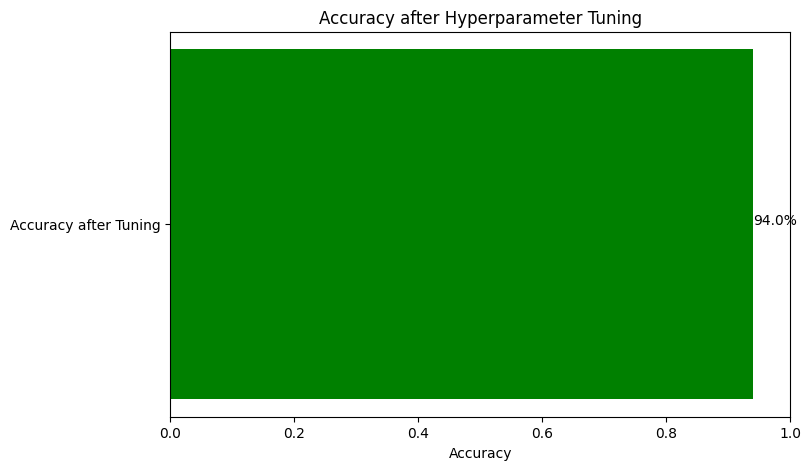

In [52]:
accuracy_knn = 0.94  # Replace this value with your actual accuracy after hyperparameter tuning

plt.figure(figsize=(8, 5))
plt.barh(["Accuracy after Tuning"], [accuracy_knn], color='green')
plt.xlabel('Accuracy')
plt.title('Accuracy after Hyperparameter Tuning')

for index, value in enumerate([accuracy_knn]):
    plt.text(value, index, str(round(value * 100, 2)) + "%")

plt.xlim(0, 1)  # Setting the limit for x-axis to show percentage values
plt.show()


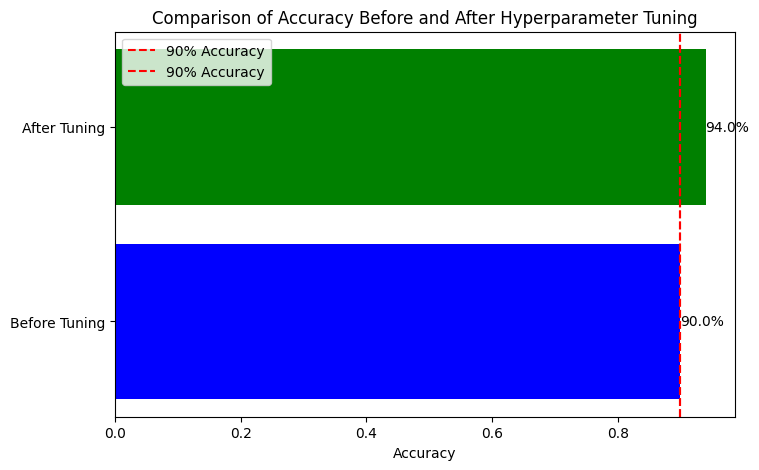

In [4]:
import matplotlib.pyplot as plt

# Accuracy scores before and after hyperparameter tuning
accuracy_before = 0.9  # Replace with your actual accuracy before tuning
accuracy_after = 0.94  # Replace with your actual accuracy after tuning

labels = ['Before Tuning', 'After Tuning']
accuracy_scores = [accuracy_before, accuracy_after]


plt.figure(figsize=(8, 5))
bars = plt.barh(labels, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Accuracy')
plt.title('Comparison of Accuracy Before and After Hyperparameter Tuning')

for bar, value in zip(bars, accuracy_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{round(value * 100, 2)}%', 
             va='center', ha='left')
    
plt.axvline(x=0.9, color='red', linestyle='--', label='90% Accuracy')  # Adding a line at 90% for comparison
plt.legend()
plt.show()
